# Graph Neural Network

### Loading the files

In [5]:
import pandas as pd
nodes_Plant_Storage_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/Nodes Type (Plant & Storage).csv')
nodes_Group_Subgroup_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/Node Types (Product Group and Subgroup).csv')

edges_group_df = pd.read_csv('Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Product Group).csv')
edges_subgroup_df = pd.read_csv('Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Product Sub-Group).csv')
edges_storage_df = pd.read_csv('Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Storage Location).csv')



In [6]:
nodes_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/NodesIndex.csv')
print(nodes_df.head())
print('nodes_df shape:', nodes_df.shape)


         Node  NodeIndex
0  SOS008L02P          0
1  SOS005L04P          1
2  SOS003L04P          2
3  SOS002L09P          3
4  SOS001L12P          4
nodes_df shape: (40, 2)


In [7]:
edges_plant_df = pd.read_csv('Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Plant).csv')
print(edges_plant_df.head())
print('edges_plant_df shape:', edges_plant_df.shape)

   Plant  node1  node2
0   1901     28     24
1   1903     22     24
2   1903     22     26
3   1903     22     31
4   1903     22     29
edges_plant_df shape: (1647, 3)


In [8]:
temp_prod_df = pd.read_csv('Raw Dataset/Homogenoeus/Temporal Data/Weight/Production_cleaned.csv')
print(temp_prod_df.head())
print('temp_prod_df shape:', temp_prod_df.shape)

                  Date  SOS008L02P  SOS005L04P  SOS003L04P  SOS002L09P  \
0  2023-01-01 00:00:00    14.83776     55.3472     0.00000    33.68304   
1  2023-01-02 00:00:00    14.92608    110.4000     0.00000    99.36000   
2  2023-01-03 00:00:00     0.00000     73.8208     0.00000    83.67768   
3  2023-01-04 00:00:00     0.00000    193.1448    22.23456   256.31568   
4  2023-01-05 00:00:00     0.00000    294.4000    22.32288   264.96000   

   SOS001L12P  SOS500M24P  SOS250M48P  SOP001L12P  POV005L04P  ...  MAHS025K  \
0    44.33664    11.07312         0.0      0.0000      0.0000  ...       1.2   
1    77.28000    38.64000         0.0      0.0000      2.8028  ...       0.0   
2   110.40000    93.84000         0.0      0.0000      0.0000  ...       0.0   
3   117.22272    80.38224         0.0      0.1104      0.0000  ...       0.0   
4   167.32224    88.32000         0.0      4.4160      9.1000  ...       0.0   

   SE500G24P  SE200G24P  ATPPCH5X5K  ATPA1K24P  MAPA1K24P  MAP1K25P  MAC1K

In [9]:
temp_prod_df.drop('Date',axis=1,inplace=True)

In [10]:
print('temp_prod_df:', temp_prod_df.head())
print('temp_prod_df shape:', temp_prod_df.shape)    

temp_prod_df:    SOS008L02P  SOS005L04P  SOS003L04P  SOS002L09P  SOS001L12P  SOS500M24P  \
0    14.83776     55.3472     0.00000    33.68304    44.33664    11.07312   
1    14.92608    110.4000     0.00000    99.36000    77.28000    38.64000   
2     0.00000     73.8208     0.00000    83.67768   110.40000    93.84000   
3     0.00000    193.1448    22.23456   256.31568   117.22272    80.38224   
4     0.00000    294.4000    22.32288   264.96000   167.32224    88.32000   

   SOS250M48P  SOP001L12P  POV005L04P  POV002L09P  ...  MAHS025K  SE500G24P  \
0         0.0      0.0000      0.0000     0.00000  ...       1.2        6.0   
1         0.0      0.0000      2.8028     4.99590  ...       0.0        1.8   
2         0.0      0.0000      0.0000     0.01638  ...       0.0        1.8   
3         0.0      0.1104      0.0000    11.58066  ...       0.0        0.6   
4         0.0      4.4160      9.1000     6.61752  ...       0.0        6.0   

   SE200G24P  ATPPCH5X5K  ATPA1K24P  MAPA1K24P  

## 1. Creating the graph object

We need to convert our data in the format of several csv files into a graph structure in order to apply GNNs.

In [11]:
import networkx as nx
import torch
from torch_geometric.utils import from_networkx

In [12]:
G = nx.Graph()

## Nodes
# Products
for index, row in nodes_df.iterrows():
    G.add_node(row['NodeIndex'],prod_data = temp_prod_df[row['Node']])


## Edges
# Plants
for index, row in edges_plant_df.iterrows():
    G.add_edge(row['node1'], row['node2'], data=row['Plant'])



In [13]:
print(G.number_of_nodes(), G.number_of_edges())

40 360


#### Visualizing the graph

In [41]:
import plotly.graph_objects as go

def plot_3d_networkx_graph(G):
    # 3D spring layout
    pos = nx.spring_layout(G, dim=3)

    # Extract node positions
    x_nodes = [pos[node][0] for node in G.nodes()]
    y_nodes = [pos[node][1] for node in G.nodes()]
    z_nodes = [pos[node][2] for node in G.nodes()]
    
    # Extract node labels
    node_labels = list(G.nodes())

    # Extract edge positions
    x_edges = []
    y_edges = []
    z_edges = []
    for edge in G.edges():
        x_edges += [pos[edge[0]][0], pos[edge[1]][0], None]
        y_edges += [pos[edge[0]][1], pos[edge[1]][1], None]
        z_edges += [pos[edge[0]][2], pos[edge[1]][2], None]

    # Create the plot
    edge_trace = go.Scatter3d(
        x=x_edges, y=y_edges, z=z_edges,
        mode='lines',
        line=dict(color='black', width=1),
        hoverinfo='none'
    )

    node_trace = go.Scatter3d(
        x=x_nodes, y=y_nodes, z=z_nodes,
        mode='markers+text',
        marker=dict(symbol='circle', size=6, color='blue'),
        text=node_labels,
        hoverinfo='text',
        textposition='top center'
    )

    layout = go.Layout(
        title='3D Network Graph',
        showlegend=False,
        scene=dict(
            xaxis=dict(showbackground=False, visible=False),
            yaxis=dict(showbackground=False, visible=False),
            zaxis=dict(showbackground=False, visible=False),
        )
    )

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

In [42]:
plot_3d_networkx_graph(G)

Converting networkx graph into torch_geometrics object

In [17]:
data = from_networkx(G)
# Add node features
data.prod_data = torch.tensor([G.nodes[n]['prod_data'] for n in G.nodes()], dtype=torch.float)
print(data)

Data(edge_index=[2, 720], prod_data=[40, 221], data=[720], num_nodes=40)


Encoding the 'Group' attribute as our label and converting it to a torch tensor, so we can add it to our data.

In [18]:
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Group' column as integers
nodes_Group_Subgroup_df['Group_encoded'] = label_encoder.fit_transform(nodes_Group_Subgroup_df['Group'])

# Convert the 'Group_encoded' column into a torch.tensor
group_tensor = torch.tensor(nodes_Group_Subgroup_df['Group_encoded'].values)

# Adding the labels to our graph object
data.y = group_tensor


Performing the Train-/Val-/Test-Split on our graph object.

In [19]:
import torch_geometric.transforms as T

split = T.RandomNodeSplit(num_val=0.1, num_test=0.3)
data = split(data)

print(data)

Data(edge_index=[2, 720], prod_data=[40, 221], data=[720], num_nodes=40, y=[40], train_mask=[40], val_mask=[40], test_mask=[40])


## 2.Building the GNN

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader

class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, 16)
        self.conv3 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.prod_data, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x =self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)



In [28]:
# Define the model, optimizer, and loss function
model = GCN(in_channels=221, out_channels=5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()



In [29]:
# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluation function
def test(mask):
    model.eval()
    out = model(data)
    pred = out[mask].max(1)[1]
    acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
    return acc


## 3.Training

Now we can start training on our model. We will save the loss and accuracies for each epoch so we can plot them later.

In [30]:
# Loss
train_losses = []
val_losses = []

# Accuracy
train_accs = []
val_accs = []
test_accs = []

# Train the model
for epoch in range(100):
    train_loss = train()
    train_losses.append(train_loss)
    train_acc = test(data.train_mask)
    train_accs.append(train_acc)
    val_acc = test(data.val_mask)
    val_accs.append(val_acc)
    test_acc = test(data.test_mask)
    test_accs.append(test_acc)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Train_Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

    model.eval()
    with torch.no_grad():
        val_out = model(data)
        val_loss = criterion(val_out[data.val_mask], data.y[data.val_mask])
        val_losses.append(val_loss.item())


Epoch 0, Train_Loss: 10.2906, Train Acc: 0.3750, Val Acc: 0.0000, Test Acc: 0.1667
Epoch 10, Train_Loss: 1.2016, Train Acc: 0.4583, Val Acc: 0.5000, Test Acc: 0.5000
Epoch 20, Train_Loss: 0.9629, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 30, Train_Loss: 0.9115, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 40, Train_Loss: 0.8964, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 50, Train_Loss: 0.8865, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 60, Train_Loss: 0.8804, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 70, Train_Loss: 0.8775, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 80, Train_Loss: 0.8757, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500
Epoch 90, Train_Loss: 0.8739, Train Acc: 0.5833, Val Acc: 0.0000, Test Acc: 0.2500


## Evaluation

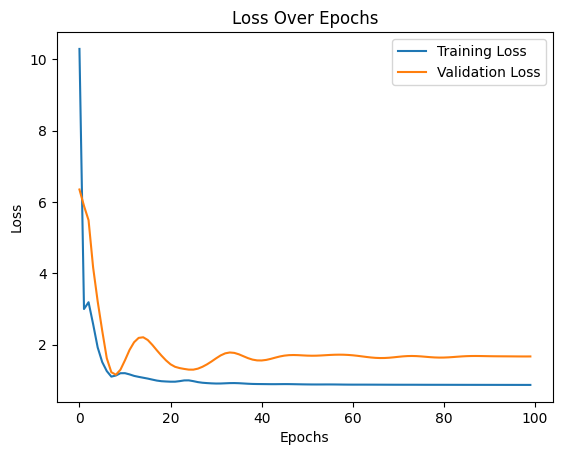

In [31]:

import matplotlib.pyplot as plt

epochs = range(len(train_losses))

plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('images/loss.png')
plt.show()

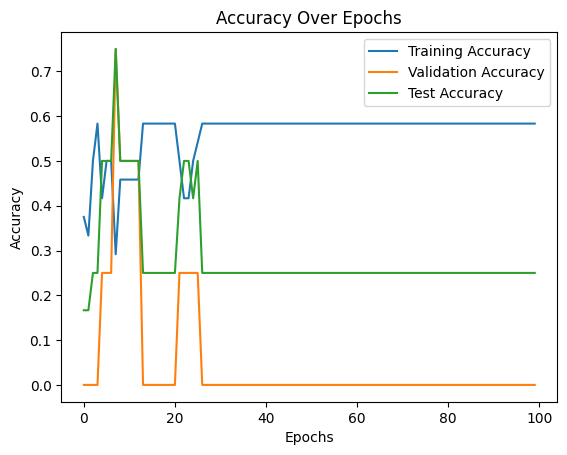

In [32]:
epochs = range(len(train_losses))

plt.plot(epochs, train_accs, label='Training Accuracy')
plt.plot(epochs, val_accs, label='Validation Accuracy')
plt.plot(epochs, test_accs, label='Test Accuracy')

plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('images/accuracy.png')
plt.show()

Confusion Matrix:
[[1 0 0 0]
 [4 0 0 0]
 [0 0 2 0]
 [0 0 5 0]]


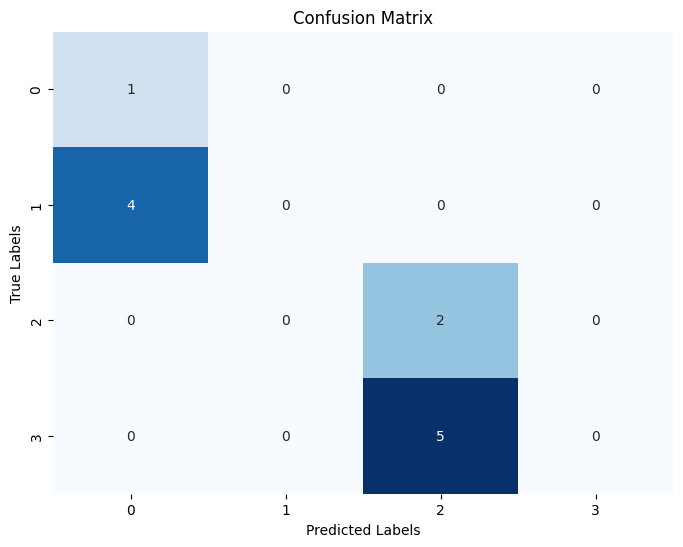

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 7: Make Predictions for the Test Set and Evaluate the Model
model.eval()
out = model(data)
pred = out[data.test_mask].max(1)[1]
true = data.y[data.test_mask]

# Convert predictions and true labels to numpy arrays
pred_np = pred.cpu().numpy()
true_np = true.cpu().numpy()

# Generate confusion matrix
conf_matrix = confusion_matrix(true_np, pred_np)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix.png')
plt.show()

In [401]:
# Generate classification report
class_report = classification_report(true_np, pred_np)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.56      1.00      0.71         5

    accuracy                           0.42        12
   macro avg       0.11      0.20      0.14        12
weighted avg       0.23      0.42      0.30        12



/Users/patrickreck/anaconda3/envs/DS_Lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/patrickreck/anaconda3/envs/DS_Lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/patrickreck/anaconda3/envs/DS_Lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Backup

In [83]:
def train_node_classifier(model, graph, optimizer, criterion, n_epochs=200):

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc = eval_node_classifier(model, graph, graph.val_mask)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val Acc: {acc:.3f}')

    return model


def eval_node_classifier(model, graph, mask):

    model.eval()
    pred = model(graph).argmax(dim=1)
    correct = (pred[mask] == graph.y[mask]).sum()
    acc = int(correct) / int(mask.sum())

    return acc
  
  
mlp = MLP()
optimizer_mlp = torch.optim.Adam(mlp.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
print(graph)
mlp = train_node_classifier(mlp, graph, optimizer_mlp, criterion, n_epochs=150)

test_acc = eval_node_classifier(mlp, graph, graph.test_mask)
print(f'Test Acc: {test_acc:.3f}')

Data(edge_index=[2, 1368], prod_data=[40, 221], data=[1368], num_nodes=40, y=[41], train_mask=[40], val_mask=[40], test_mask=[40])


/Users/patrickreck/anaconda3/envs/DS_Lecture/lib/python3.12/site-packages/torch/nn/init.py:452: UserWarning:

Initializing zero-element tensors is a no-op



TypeError: linear(): argument 'input' (position 1) must be Tensor, not NoneType

In [ ]:
# Create the model, define the optimizer and the loss function
model = GCN(in_channels=1, out_channels=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Example training loop
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)
    # Assuming we have labels (e.g., for a node classification task)
    labels = torch.tensor([0, 1, 0], dtype=torch.long)
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
